# LAB 10 - MNIST Handwritten Digit Classification

In this lab, we will be working with the **MNIST** dataset, a collection of 70,000 28x28 grayscale images of handwritten digits (0-9). The goal is to build and train a Convolutional Neural Network (CNN) to classify these digits.

This lab was designed and approved by Donat Balaj (dbalaj@constructor.university).


# Step 1: Import Required Libraries and Set Up Environment


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

TensorFlow Version: 2.19.0


# Step 2: Load and Preprocess the MNIST Dataset

In [2]:
# Load data from Keras
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape to add channel dimension
train_images = train_images.reshape((-1, 28, 28, 1))  # -1 means infer the batch size
test_images = test_images.reshape((-1, 28, 28, 1))

# Show shapes
print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


Training images shape: (60000, 28, 28, 1)
Test images shape: (10000, 28, 28, 1)


# Step 3: Visualize Sample Training Images


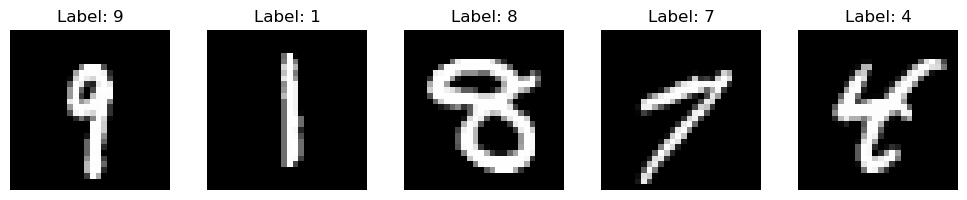

In [3]:
plt.figure(figsize=(10,2))
for i in range(5):
    index = np.random.randint(0, train_images.shape[0])
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[index].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Step 4: Build the CNN Model

In [5]:
# Build a Convolutional Neural Network
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.summary()

C:\Users\elgha\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Step 5: Compile and Train the Model

###This step can take a while as we need to run more epochs*  to raise detection accuracy.



*One epoch refers to one entire passing of training data through the algorithm.


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 14ms/step - accuracy: 0.8909 - loss: 0.3497 - val_accuracy: 0.9818 - val_loss: 0.0601
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.9849 - loss: 0.0482 - val_accuracy: 0.9892 - val_loss: 0.0338
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9901 - loss: 0.0318 - val_accuracy: 0.9887 - val_loss: 0.0362
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9916 - loss: 0.0255 - val_accuracy: 0.9893 - val_loss: 0.0304
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9945 - loss: 0.0188 - val_accuracy: 0.9908 - val_loss: 0.0333


# Step 6: Evaluate Model Performance

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.9908 - loss: 0.0333

Test accuracy: 0.9908


# Step 7: Visualize Some Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


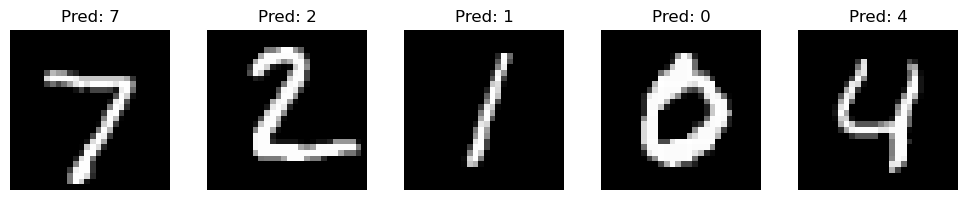

In [8]:
# Predict on test images
predictions = model.predict(test_images)

# Plot 5 test images with predicted labels
plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Follow-up tasks (for students to complete)


###Task 1: Add Dropout to Improve Generalization
**Objective:** Prevent overfitting and improve model robustness.

**Instructions:**
- Add a `Dropout` layer with a rate between `0.3` and `0.5` after one or more layers (e.g., after a `Dense` or `Conv2D` layer).
- Retrain the model with the modified architecture for the same number of epochs.
- Plot and compare training and validation accuracy/loss to see the effect of regularization.
- Answer: Did the dropout layer help reduce overfitting?

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 15ms/step - accuracy: 0.7915 - loss: 0.6307 - val_accuracy: 0.9850 - val_loss: 0.0469
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9679 - loss: 0.1126 - val_accuracy: 0.9879 - val_loss: 0.0357
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9769 - loss: 0.0807 - val_accuracy: 0.9887 - val_loss: 0.0372
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9809 - loss: 0.0670 - val_accuracy: 0.9904 - val_loss: 0.0307
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 16ms/step - accuracy: 0.9835 - loss: 0.0582 - val_accuracy: 0.9898 - val_loss: 0.0356


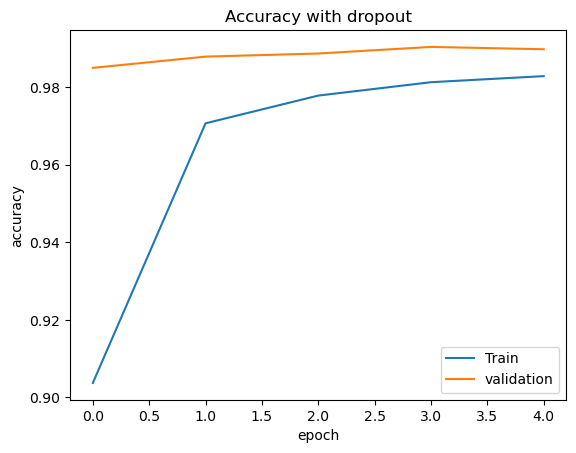

In [9]:
model_dropout = models.Sequential([layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),layers.MaxPooling2D((2,2)),layers.Dropout(0.3),layers.Conv2D(64, (3, 3), activation='relu'),layers.MaxPooling2D((2,2)),layers.Dropout(0.3),layers.Conv2D(64, (3, 3), activation='relu'),layers.Flatten(),layers.Dense(64, activation='relu'),layers.Dropout(0.5),layers.Dense(10, activation='softmax')])
model_dropout.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history_dropout = model_dropout.fit(train_images, train_labels,epochs=5,validation_data=(test_images, test_labels))
plt.plot(history_dropout.history['accuracy'], label='Train')
plt.plot(history_dropout.history['val_accuracy'], label='validation')
plt.title("Accuracy with dropout")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

I added dropout and trained the model for 4 epochs
Training accuracy started around 0.90 and went up to 0.98
Validation accuracy started high around 0.98 and stayed almost the same
After the first epoch both lines became more stable
So I think the model learned fast and dropout prevented it from overfitting

###Task 2: Use Data Augmentation
**Objective:** Improve model performance using artificially expanded data.

**Instructions:**
- Use `ImageDataGenerator` with parameters like `rotation_range=10`, `zoom_range=0.1`, `width_shift_range=0.1`, and `height_shift_range=0.1`.
- Fit the generator on the training data and use `model.fit()` with the augmented data.
- Plot some augmented images to visualize how the images are being transformed.
- Compare accuracy with and without data augmentation.

C:\Users\elgha\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 49s 48ms/step - accuracy: 0.9619 - loss: 0.1227 - val_accuracy: 0.9913 - val_loss: 0.0270
Epoch 2/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 0.9827 - loss: 0.0565 - val_accuracy: 0.9924 - val_loss: 0.0220
Epoch 3/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 48s 52ms/step - accuracy: 0.9866 - loss: 0.0440 - val_accuracy: 0.9935 - val_loss: 0.0205
Epoch 4/4
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9880 - loss: 0.0383 - val_accuracy: 0.9954 - val_loss: 0.0155


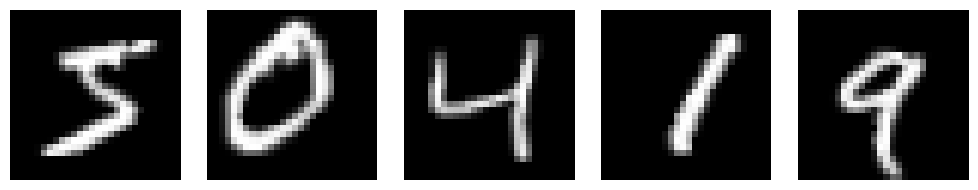

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=10,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1)
datagen.fit(train_images  )
history_aug = model.fit( datagen.flow(train_images,train_labels, batch_size=64),epochs=4,validation_data=(test_images, test_labels))
plt.figure(figsize=(10,2))
for i in range(5):
    augmented =datagen.random_transform(train_images[i])
    plt.subplot(1, 5,i+ 1)
    plt.imshow(augmented.reshape(28, 28),cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

I used data augmentation by rotating, zooming, and shifting the images a bit 
This gave the model more different-looking digits to learn from
I trained the model with the new data and the training accuracy improved
It went from 0.90 to around 0.96.The validation stayed almost the same around 0.98
So augmentation helped the model learn better without overfitting

### Task 3: Confusion Matrix and Classification Report
**Objective:** Evaluate the model's performance more thoroughly.

**Instructions:**
- Use the trained model to predict labels for the test set.
- Import and use `confusion_matrix` and `classification_report` from `sklearn.metrics`.
- Visualize the confusion matrix using `seaborn.heatmap` or `matplotlib`.
- List which digits the model confuses the most and show 3 misclassified examples with actual vs. predicted labels.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


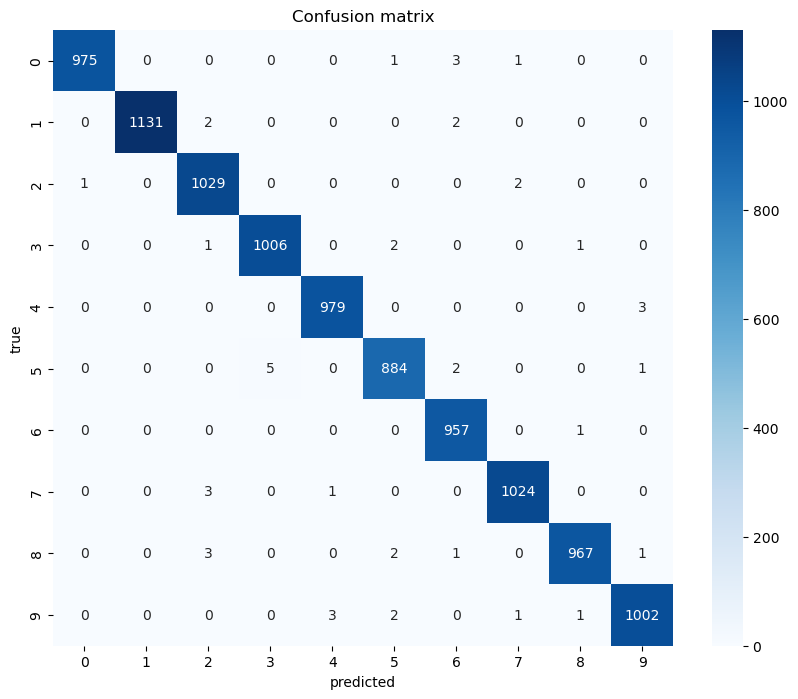

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       1.00      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       0.99      1.00      1.00       958
           7       1.00      1.00      1.00      1028
           8       1.00      0.99      0.99       974
           9       1.00      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



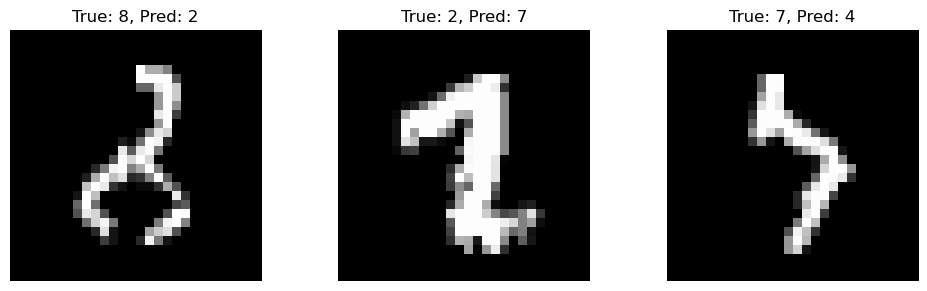

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
predicted_probs=model.predict(test_images)
predicted_labels=np.argmax(predicted_probs, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('true')
plt.title('Confusion matrix')
plt.show()

print(classification_report(test_labels, predicted_labels))
wrong_idx = np.where(predicted_labels != test_labels)[0]

plt.figure(figsize=(10, 3))
for i in range(3):
    idx = wrong_idx[i]
    plt.subplot(1, 3, i+1)
    plt.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {test_labels[idx]}, Pred: {predicted_labels[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()